In [2]:
import serial
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.optimize

In [3]:
# Note 1: This python script was designed to run with Python 3.
#
# Note 2: The script uses "pyserial" which must be installed.  If you have
#         previously installed the "serial" package, it must be uninstalled
#         first.
#
# Note 3: While this script is running you can not re-program the Arduino.
#         Before downloading a new Arduino sketch, you must exit this
#         script first.
arduinoComPort = "COM5"


# Set the baud rate
# NOTE1: The baudRate for the sending and receiving programs must be the same!
# NOTE2: For faster communication, set the baudRate to 115200 below
#        and check that the arduino sketch you are using is updated as well.
baudRate = 9600


# open the serial port
serialPort = serial.Serial(arduinoComPort, baudRate, timeout=1)


panMin = 0
panMax = 70
panStep = 1
tiltMin = 0
tiltMax = 0
tiltStep = 0
numRows = int(((panMax-panMin)/panStep +1))
ptsrData = [[0]*4] * numRows
# print(ptsrData)
# ptsrData.astype(int)
# print(ptsrData)

i = 0
# main loop to read data from the Arduino, then display it
while i < numRows:
    # print(ptsrData)
    # ask for a line of data from the serial port, the ".decode()" converts the
    # data from an "array of bytes", to a string
    lineOfData = serialPort.readline().decode()

    # check if data was received
    if len(lineOfData) > 0:
        # print(lineOfData)
        # print(len(lineOfData))

        if len(lineOfData) == 3:
            if int(lineOfData) == 1: # done with scan
                print(ptsrData)
                i = numRows
            elif int(lineOfData) == 0: # restarting scan
                ptsrData = np.zeros((numRows,4))
                i = 0
        else: # continue with this scan
            # data was received, convert it into 4 integers
            panPos, tiltPos, senseVal = (int(x) for x in lineOfData.split(','))

            # # print the results
            # print("panPos = " + str(panPos), end="")
            # print(", tiltPos = " + str(tiltPos), end="")
            # print(", senseVal = " + str(senseVal))
            print([panPos, tiltPos, senseVal, 0.0])
            ptsrData[i] = [panPos, tiltPos, senseVal, 0.0]
            i = i+1

[0, 0, 0, 0.0]
[0, 2, 37, 0.0]
[0, 4, 226, 0.0]
[0, 6, 92, 0.0]
[0, 8, 109, 0.0]
[0, 10, 36, 0.0]
[0, 12, 4, 0.0]
[0, 14, 4, 0.0]
[0, 16, 5, 0.0]
[0, 18, 9, 0.0]
[0, 20, 12, 0.0]
[0, 22, 4, 0.0]
[0, 24, 71, 0.0]
[0, 26, 11, 0.0]
[0, 28, 0, 0.0]
[0, 30, 11, 0.0]
[0, 32, 4, 0.0]
[0, 34, 15, 0.0]
[0, 36, 4, 0.0]
[0, 38, 5, 0.0]
[0, 40, 248, 0.0]
[0, 42, 77, 0.0]
[0, 44, 4, 0.0]
[0, 46, 5, 0.0]
[0, 48, 7, 0.0]
[0, 50, 113, 0.0]
[0, 52, 248, 0.0]
[0, 54, 5, 0.0]
[0, 56, 7, 0.0]
[0, 58, 117, 0.0]
[0, 60, 4, 0.0]
[0, 62, 229, 0.0]
[0, 64, 177, 0.0]
[0, 66, 157, 0.0]
[0, 68, 4, 0.0]
[0, 70, 73, 0.0]
[[0, 0, 0, 0.0], [0, 2, 37, 0.0], [0, 4, 226, 0.0], [0, 6, 92, 0.0], [0, 8, 109, 0.0], [0, 10, 36, 0.0], [0, 12, 4, 0.0], [0, 14, 4, 0.0], [0, 16, 5, 0.0], [0, 18, 9, 0.0], [0, 20, 12, 0.0], [0, 22, 4, 0.0], [0, 24, 71, 0.0], [0, 26, 11, 0.0], [0, 28, 0, 0.0], [0, 30, 11, 0.0], [0, 32, 4, 0.0], [0, 34, 15, 0.0], [0, 36, 4, 0.0], [0, 38, 5, 0.0], [0, 40, 248, 0.0], [0, 42, 77, 0.0], [0, 44, 4, 0.0],

In [4]:
# print(ptsrData)
ptsrNP = np.array(ptsrData)
print(ptsrNP)


[[  0.   0.   0.   0.]
 [  0.   2.  37.   0.]
 [  0.   4. 226.   0.]
 [  0.   6.  92.   0.]
 [  0.   8. 109.   0.]
 [  0.  10.  36.   0.]
 [  0.  12.   4.   0.]
 [  0.  14.   4.   0.]
 [  0.  16.   5.   0.]
 [  0.  18.   9.   0.]
 [  0.  20.  12.   0.]
 [  0.  22.   4.   0.]
 [  0.  24.  71.   0.]
 [  0.  26.  11.   0.]
 [  0.  28.   0.   0.]
 [  0.  30.  11.   0.]
 [  0.  32.   4.   0.]
 [  0.  34.  15.   0.]
 [  0.  36.   4.   0.]
 [  0.  38.   5.   0.]
 [  0.  40. 248.   0.]
 [  0.  42.  77.   0.]
 [  0.  44.   4.   0.]
 [  0.  46.   5.   0.]
 [  0.  48.   7.   0.]
 [  0.  50. 113.   0.]
 [  0.  52. 248.   0.]
 [  0.  54.   5.   0.]
 [  0.  56.   7.   0.]
 [  0.  58. 117.   0.]
 [  0.  60.   4.   0.]
 [  0.  62. 229.   0.]
 [  0.  64. 177.   0.]
 [  0.  66. 157.   0.]
 [  0.  68.   4.   0.]
 [  0.  70.  73.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.

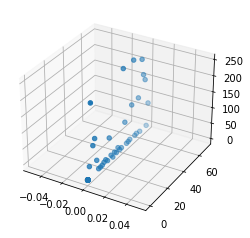

In [5]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(ptsrNP[:,0], ptsrNP[:,1], ptsrNP[:,2])


In [6]:
dsNP = np.load("calibration_data_0.npy")

dsNP = np.array(ds)
print(dsNP)

c = np.polyfit(dsNP[:,1],dsNP[:,0],6)
print(c)

xp = np.linspace(np.amin(dsNP[:,1]),np.amax(dsNP[:,1]), 100)
# xp = np.linspace(0,400, 100)
p = np.poly1d(c)

i = 0
while i < numRows:
    if ptsrNP[i,2]>np.amax(dsNP[:,1]):
        ptsrNP[i,3] = np.amin(dsNP[:,0])
    elif ptsrNP[i,2]<np.amin(dsNP[:,1]):
        ptsrNP[i,3] = np.amax(dsNP[:,0])
    else:
        ptsrNP[i,3] = p(ptsrNP[i,2])
    i = i+1

# i = 0
# while i < numRows:
#     if ptsrNP[i,3]>100:
#         ptsrNP[i,3] = 0
#     elif ptsrNP[i,3]<10:
#         ptsrNP[i,3] = 0
#     else:
#         ptsrNP[i,3] = p(ptsrNP[i,2])
#     i = i+1

print(ptsrNP)

fig = plt.figure()
ax = plt.axes()
plt.plot(dsNP[:,0],dsNP[:,1], 'o', p(xp),xp, '-',ptsrNP[:,3],ptsrNP[:,2],'.')

NameError: name 'ds' is not defined

In [ ]:
fig = plt.figure()
ax = plt.axes()
plt.plot(-ptsrNP[:,0],-ptsrNP[:,3], 'o')

NameError: name 'plt' is not defined

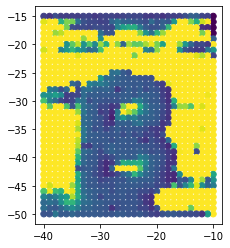

In [ ]:
fig = plt.figure()
ax = plt.axes()
plt.scatter(-ptsrNP[:,1],-ptsrNP[:,0],s=None,c=ptsrNP[:,3])
ax.set_aspect('equal', 'box')

In [ ]:
np.save("scan1",ptsrNP)

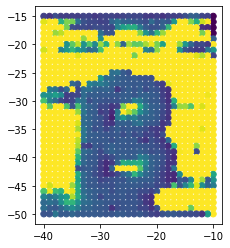

In [ ]:
ptsrNP_loaded = np.load("scan1.npy")
fig = plt.figure()
ax = plt.axes()
plt.scatter(-ptsrNP_loaded[:,1],-ptsrNP_loaded[:,0],s=None,c=ptsrNP_loaded[:,3])
ax.set_aspect('equal', 'box')